# Designing a thermostable protease from *Geobacillus stearothermophilus*
## By Houcemeddine Othman 

Even though the practical  drew inspiration from the study by [Mansfeld et al, (1997)](https://www.sciencedirect.com/science/article/pii/S0021925818406163), the practical were designed from scratch and the original results were used to add a subtle sense of realism to the work.

The aim of our study is to design a stable enzyme that is active at high temperatures. The reference protein, the so called thermolysin-like protein (TLP) was isolated from *Geobacillus stearothermophilus* a rod-shaped, Gram-positive bacterium and a member of the phylum *Bacillota*. TLP has a wide range of applications in industry and pharmacology, particularly in the food and pharmaceutical sectors. In the food industry, TLP is used in the production of food ingredients and additives, such as hydrolyzed proteins, flavor enhancers, and functional peptides. In addition, TLP has shown potential in pharmaceutical and biomedical applications. For example, TLP can be used in the production of therapeutic peptides and proteins, such as enzyme inhibitors, antimicrobial peptides, and vaccines.

The goal of the practical is to design an engineered protein that could operate catalytic reactions at high temperatures. 

## Tools needed for the practical
* Foldx 5.0 (free for academic users)[https://foldxsuite.crg.eu/]
* PyMOL or EduPyMOL, (free for academic users).
* YASARA (optional)

## Answer the questions
* What is the reference sequence for the protein?
* Is there a structure for the protection
* retrieve the sequence of the protein in a FASTA format

## Modeling Protein 
Use the [Swiss model](https://swissmodel.expasy.org/) platform to search for a template and build the model.
Assess the protein quality using the Ramachandran plot and the available tools from the modeling platform.

## Preprocessing the structure
*In silico* analysis software uses customized energy functions to model the thermodynamic properties of the protein. These models may not always be compatible with those used to model the protein (such as in our case Swiss model) or the energy functions used to solve the structure of the protein. This may result in an overestimation of the energy of the system when we perform the calculation over non-relaxed structures. In our case, we need to use FoldX to "repair the structure". This includes adding any missing atoms to the system and changing the rotameric state of the side chains to remove bad contacts. 

```
foldx --command=RepairPDB --pdb=model_tlp.pdb
```
If you are operating on a Windows system, you may need to call this command from the folder where the input PDB file is harbored.

```
foldx.exe --command=RepairPDB --pdb=model_tlp.pdb
```
## Establishing the alanine scanning profile
Key residues of the protein are functionally important amino acids that are most likely to disrupt the protein structure upon a mutation. It is an important part of any *in silico* to reveal these positions. For such a reason, we will perform an alanine scanning analysis using `foldx`. The input file must be the protein-repaired structure.

```
foldx  --command=AlaScan --pdb=model_tlp_Repair.pdb
```
The output is a column-wise data file with suffix `_AS.fxout`. In my case, it's `model_tlp_Repair_AS.fxout`. The file looks like the following. 

Let's plot the data using matplotlib library. If you are using Google Colab notebook, you need first to upload the file

Text(0, 0.5, 'energy variation (kcal/mol)')

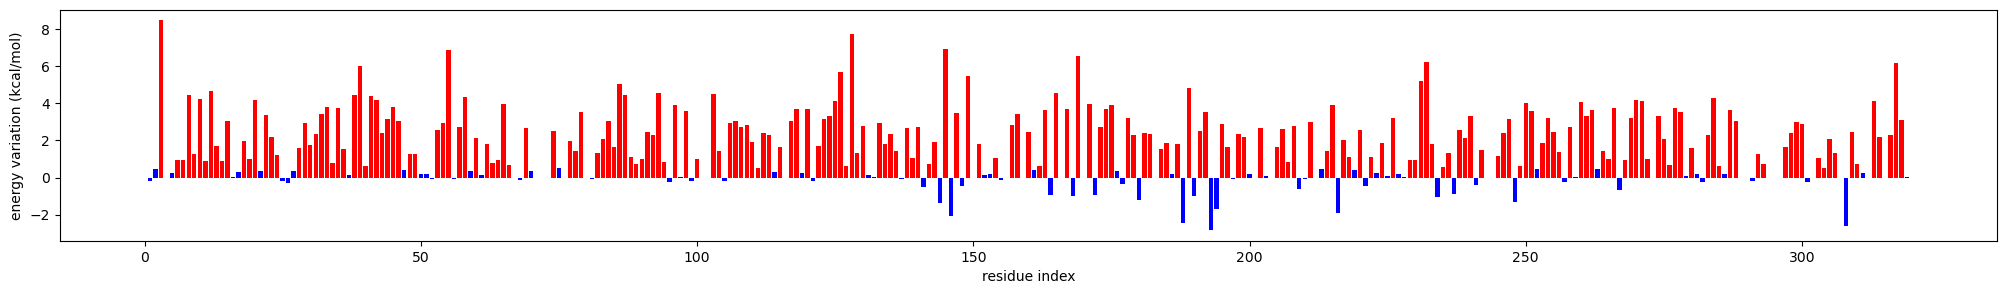

In [19]:
import pandas as pd 
import matplotlib.pylab as plt 
plt.figure(figsize=(25, 3))  # Width: 10 inches, Height: 6 inches
alascan = pd.read_table("output/model_tlp_Repair_AS.fxout", sep="\s",
                        names=["residue", "seq_index", "label1", "ala", "label2", "label3" , "label4", "energy"],
                       engine='python')
colors = ['red' if val > 0.5 else 'blue' for val in alascan.energy]
plt.bar(alascan.seq_index, alascan.energy, color=colors)
plt.xlabel("residue index")
plt.ylabel("energy variation (kcal/mol)")

## Disulfide bond design

Statistical analysis on protein structures of the PDB showed that disulfide bonds adopt a specific geometry. For example, the χ3 torsion angle, which is defined by the rotation of the two Cβ atoms about the Sγ-Sγ bond, should have peaks around -87° and +97°. The energy of the potential disulfide bond should be less than 2.2 kcal/mol, as 90% of native disulfide bonds have an energy value below this threshold. 

<img src="https://www.researchgate.net/publication/338749421/figure/fig1/AS:850131482062848@1579698548143/Geometry-of-a-disulfide-bond-The-covalent-bond-between-the-sulfur-atoms-of-cysteine.png" width="250" height="150">


Potential disulfide bonds could be identified using automated tools the consider these criteria in the prediction process. The online web server ['Disulfide by Design 2'](http://cptweb.cpt.wayne.edu/DbD2/index.php) will be used to identify potantial disulfide bond sites in the predicted structure of TLP. I have changed my default settings to allow a margin of 5 degrees above or below the χ3 angle interval and 4 degrees tolerance for the Cα-Cβ-Sγ angle. 

### Mapping the putative sites to the structure
PyMOL CLI could be used to map the putative position of the protein structure. This will allow for a better perspective when you try to integrate all the informations that you have collected so far to decide where the mutation should be introduced. 

```
select group1, resi 21+79+116+169+190+192+272
select group2, resi 35+143+136+237+204+205+294
```
This will create two objects in PyMOL workspace on which you may apply different representations. 

### Generating the mutant form
There are multiple options to generate the mutant form. In PyMOL, the mutagenesis plugin could be used to pick the mutation sites and apply the CYS mutation. One other option also, is to rename the redidues within the PDB file and only keep atoms that are common to cysteine. 